In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy import stats

np.random.seed(123)

from pydataset import data

from env import host, user, password

from wrangle_telco import wrangle_telco
from explore import correlation_exploration

## Hypothesis Testing

### <font color=red>What is Hypothesis Testing?</font>

<img width="150" align='left' src=https://i.pinimg.com/564x/3e/23/c9/3e23c9920ea9f1f5c4b6b40c0595b2c1.jpg>

- Hypothesis tests are used to draw conclusions, answer questions, or interpret beliefs we have about a population using sample data.


- A hypothesis test evaluates two mutually exclusive statements about a population and informs us which statement is best supported by our sample data.

$H_0$: There is no difference between smokers' tips and the overall population's tip average.

$H_a$: There is a difference between smokers' tips and the overall population's tip average.

- After running and interpreting the values returned by the appropriate statistical test for my data, I will either fail to reject or reject the Null Hypothesis.

[Here](https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/p-value-approach) is a simple, yet detailed explanation of this process if you need a little more.

### <font color=orange>So What?</font>

>"There are two possible outcomes; if the result confirms the hypothesis, then you've made a measurement. If the result is contrary to the hypothesis, then you've made a discovery." - Enrico Fermi

### <font color=green>Now What?</font>

<img width="400" align='left' src=https://i.pinimg.com/564x/9a/5f/c6/9a5fc66f5985a5ca79013665b3f54a98.jpg >

___

### Important Terms

- **a confidence level** is the probability that if a poll/test/survey were repeated over and over again, the results obtained would be the same. It conveys how confident we are in our results. Raising your confidence level lowers your chances of Type I Errors, or False Positives. (Common examples might be 90%, 95%, or 99%)


- **alpha** --> $a$ = 1 - confidence level. If the resulting p-value from the hypothesis test is less than the $a$, which you set before you begin the test, then the test findings are significant. If it is close, it is at your discretion. The results still may be significant even though slightly above your chosen cutoff. *Also, alpha is the maximum probability that you have a Type I Error.* 

>For a 95% confidence level, the value of alpha is .05 which means there is a 5% chance that you will make a Type I Error (False Positive) or reject a True Null hypothesis.


- **t-statistic** is simply the calculated difference represented in units of standard error. The greater the magnitude of t, the greater the evidence against the null hypothesis. Why does it matter? **Short Answer:** It allows us to calculate our p-value!


- **p-values** are values we obtain from hypothesis testing. They represent the probability that our obtained result is due to chance given that our stated hypothesis is true.


- Looking for more information? I found this article useful.


https://towardsdatascience.com/everything-you-need-to-know-about-hypothesis-testing-part-i-4de9abebbc8a

___

### Hypothesis Testing Errors

<img src=https://i.pinimg.com/564x/cf/64/fa/cf64fa7d5feb4603e5df163b06a7ee93.jpg width="400" align='left'>

[source](https://online.stat.psu.edu/stat500/lesson/6a/6a.1#:~:text=When%20we%20fail%20to%20reject,the%20likelihood%20of%20these%20events.)

#### <font color=red>What is a Type I Error?</font>

- A Type I Error is a False Positive, which I can think of as sounding a false alarm.


- I predict there is a difference or a relationship when in reality there is no difference or no relationship.


- I reject the Null hypothesis when the Null hypothesis is actually True.

**<font color=orange>So What?</font>**

- If I am trying to determine whether a customer will churn, and my **model predicts that they will churn (positive for churn)**, but **they do not end up churning (we made a False prediction)**, this is a **False Positive**. I may have wasted time and money trying to woo a customer who was not going to leave anyway.

#### <font color=red>What is a Type II Error?</font>

- A Type II Error is a False Negative, which I can think of as a miss; I missed identifying a real difference or relationship that exists in reality.


- I predict that there is no difference or relationship when in reality there is a difference or relationship.


- I fail to reject the Null hypothesis when the Null hypothesis is actually false.

**<font color=orange>So What?</font>**

- If I am trying to determine whether a customer will churn, and my **model predicts that they will not churn (negative for churn)**, but **they end up churning (we made a False Prediction)**, this is a **False Negative**. I may have lost the opportunity to woo a customer that was going to leave, before they left.

**<font color=green>Now What?</font>**

- In practice, if I create a classification model to predict customer churn, I can decide how to balance Type I and Type II Errors to have a model that suits my needs. In the instance of churn, which type of error would be more costly to the Telco company: a Type I Error or a Type II Error? Which would be more costly if I was trying to determine if a shadow in an x-ray were cancer?

___

## T-Test - Continuous v Categorical Variables

#### <font color=red>What is a T-Test?</font>

- A type of inferential statistic used to determine if there is a significant difference between the means of two groups which may be related in certain features.


- It compares a categorical and a continuous variable by comparing the mean of the continuous variable by subgroups or the mean of a subgroup to the mean of the population.

#### <font color=orange>So What?</font>

- **One Sample T-test** is when I compare the mean for a subgroup to the population mean.
   
   >Are sales for group A higher when we run a promotion? 
   
- **Two Sample T-test** is when we compare the mean of one subgroup to the mean of another subgroup.

#### <font color=green>Now What?</font>
```python
# Set confidence level.
confidence_level = .95

# Set alpha.
alpha = 1 - confidence_level
```

- If the p-value is higher than your alpha, I fail to reject the Null Hypothesis. 


- If the p-value is lower than the alpha, I reject the Null Hypothesis.

### Types of T-Tests
**A one-sample t-test** compares the mean of a subgroup with the population mean.
  
```python
subpop = array, list, Series
  
popmean = single value

t, p = scipy.stats.ttest_1samp(subpop, popmean)
```

**A two-sample t-test** compares the means of two subgroups. 

```python
subpop_a = array, list, or Series
  
subpop_b = array, list, or Series

t, p = scipy.stats.ttest_ind(subpop_a, subpop_b)
```

___

**A one-tailed test** looks for a specific difference: appropriate if I only want to determine if there is a difference between groups in a specific direction, positive only or negative only.

```python
# Check one-tailed test for significance in positive direction. (greater than)
(p/2) < alpha

# Check one-tailed test for significance in negative direction. (less than)
(p/2) < alpha
```

<img src=https://i.pinimg.com/564x/19/b3/5b/19b35b31d4c2eda8e411280ef99f9b25.jpg width="200" align='left'>

[source](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/#:~:text=For%20example%2C%20we%20may%20wish,mean%20significantly%20less%20than%20x.)

**A two-tailed test** looks for any difference: appropriate if I want to test for significance without concern for a positive or negative direction.

```python
# Check a two-tailed test for significance, non-directional.
p < alpha
```

<img src=https://i.pinimg.com/564x/74/ea/47/74ea47b60435e2f10fb5d3e946fbaf7f.jpg width="200" align='left'>

[source](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/#:~:text=For%20example%2C%20we%20may%20wish,mean%20significantly%20less%20than%20x.)

___

#### One-Sample Example

In [3]:
# Create DataFrame from pydataset 'tips' dataset.

df = data('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


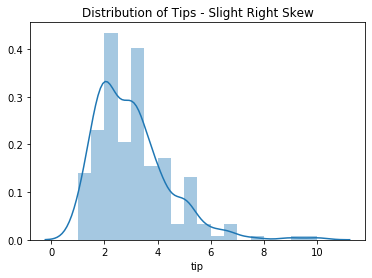

In [6]:
# T-tests assume that the continous variable is normally distributed; quick check of this.

sns.distplot(df.tip)
plt.title('Distribution of Tips - Slight Right Skew')
plt.show()

##### Mean and Median 

- The distribution is slightly right-skewed, so I'll do a quick comparison of the mean and median of `df.tip`.


- I can see below that the mean is slightly higher than the median. It's close enough to proceed, though.

In [21]:
print(f'The mean is: {df.tip.mean()}, and the median is {df.tip.median()}')
print('This is close enough to normal to continue.')

The mean is: 2.9982786885245902, and the median is 2.9
This is close enough to normal to continue.


##### Create Hypotheses

>$H_0$: There is no difference between smokers' tips and the overall population's tip average.

>$H_a$: There is a difference between smokers' tips and the overall population's tip average.

##### Set Alpha

In [22]:
# Set Confidence Interval and Alpha; check alpha.

confidence_interval = .95
alpha = round(1 - confidence_interval, 2)
print(f'alpha = {alpha}')

alpha = 0.05


##### Calculate  p-value & t-statistic

- Based on the calculated p-value and t-statistic, I fail to reject my Null Hypothesis that there is no significant difference in the average tip of smokers and the overall population.

In [23]:
# Create smokers subset of our df.

smokers = df[df.smoker == 'Yes']

In [24]:
# Assign the mean of all tips to the variable pop_mean.

pop_mean = df.tip.mean()

In [25]:
# Pass in the tip column from smokers subset and mean of tip column from entire df.

t, p = stats.ttest_1samp(smokers.tip, pop_mean)

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 0.072
p = 0.943


In [26]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: False


___

#### Two Sample Example

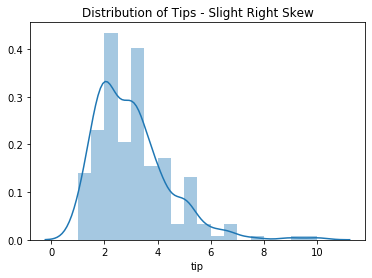

In [27]:
# T-tests assume that the continous variable is normally distributed; quick check of this.

sns.distplot(df.tip)
plt.title('Distribution of Tips - Slight Right Skew')
plt.show()

##### Mean and Median 

- The distribution is right-skewed, so we see below the mean is slightly higher than the median.


- So, let's do a quick comparison of the mean and median of `df.tip`.

In [28]:
print(f'The mean is: {df.tip.mean()}, and the median is {df.tip.median()}')
print('This is close enough to normal to continue.')

The mean is: 2.9982786885245902, and the median is 2.9
This is close enough to normal to continue.


##### Create Hypotheses

>$H_0$: There is no difference between women's and men's tips.

>$H_a$: There is a difference between women's and men's tips.

##### Set Alpha

In [29]:
# Set Confidence Interval and Alpha; check alpha.

confidence_interval = .95
alpha = round(1 - confidence_interval, 2)
print(f'alpha = {alpha}')

alpha = 0.05


In [30]:
# Create subsets of males and females from our original df.

males = df[df.sex == 'Male']
females = df[df.sex == 'Female']

##### Calculate  p-value & t-statistic

- Based on the calculated p-value and t-statistic, I fail to reject my Null Hypothesis that there is no significant difference in the average tip of men and women.

In [31]:
t, p = stats.ttest_ind(males.tip, females.tip)

In [32]:
print(f'The t-statistic for the two sample t-test comparing male to female tips is {round(t,3)}.')

The t-statistic for the two sample t-test comparing male to female tips is 1.388.


In [33]:
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')

Our p-value is 0.166.
This means there is about a 16.65% chance that we observe the data we have.


In [34]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: False


___

## Correlation - Continuous v Continuous Variables

### <font color=red>What is a correlation test?</font>

- Correlation is a statistical measure that describes how two continuous variables are related and indicates that as one variable changes in value, the other variable tends to change in a specific direction. 

>**Positive Correlation:** both variables change in the same direction.

>**Neutral or No Correlation:** No relationship in the change of the variables.

>**Negative Correlation:** variables change in opposite directions.

<img src=https://i.pinimg.com/564x/77/c0/c2/77c0c282785031d9b0bcd9c029b91760.jpg width="500" align='left'>

[source](https://lytongblog.wordpress.com/2018/12/21/correlation-between-two-variables/)

### <font color=orange>So What?</font>

- The Pearson correlation coefficient, r, is a unitless, continuous numerical measure between -1 and 1, where 1 = perfect positive correlation and -1 = perfect negative correlation. It can be used to summarize the strength of the linear relationship between two data samples.


- The bigger the value of a correlation coefficient, the less likely it is to have occurred merely by chance, and the more likely it is that it has occurred because it represents a genuine relationship between the two variables in question.


- Some machine learning algorithms, such as Linear Regressions, may not perform as well when there is multicolinearity or independent variables that are correlated.

### <font color=green>Now What?</font>

1. Calculate the Pearson correlation coefficient, r.    
2. Calculate the coresponding t-values.
3. Test whether the t-values are significant or not, p-value.


>We can use `r, p = stats.pearsonr(x,y)` to find r and p-values.

**<font color=purple>Keep in mind that...</font>**


- Correlation doesn't mean that one variable is causing the change in another variable! 
    
    
- Pearson's correlation tests measure the linear relationship between 2 variables and not other types of relationships. (There are other correlation tests, like Spearman's correlation, that test for non-linear relationships.)
    
    
- Correlations can be misleading when confounding variables are ignored. There may be a third variable influencing the other two variables in your correlation test. (An increase in ice cream sales causes an increase in murder rate.)

#### Pearson's r Examples

##### My Correlation Function

Here you can see the guts of my function correlation_exploration that I created and imported to make this processes faster. I got tired of writing the same code over and over.

```python
def correlation_exploration(df, x_string, y_string):
    '''
    This nifty function takes in a df, a string for x variable,
    and a string for y variable and displays their correlation.
    '''
    r, p = stats.pearsonr(df[x_string], df[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()
```

##### My Wrangle Function

Here you can see the guts of my function to get my Telco data from the Codeup database and clean it up for use in some examples.

```python
def wrangle_telco():
    """
    Queries the telco_churn database
    Returns a clean df with six columns:
    customer_id(object), monthly_charges(float), 
    tenure(int), total_charges(float),
    phone_service(object), internet_service_type_id(int)
    """
    df = get_data_from_sql()
    df.tenure.replace(0, 1, inplace=True)
    df.total_charges.replace(' ', df.monthly_charges, inplace=True)
    df.total_charges = df.total_charges.astype(float)
    return df
```

___

In [45]:
telco = wrangle_telco()

In [46]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   monthly_charges           7043 non-null   float64
 2   tenure                    7043 non-null   int64  
 3   total_charges             7043 non-null   float64
 4   phone_service             7043 non-null   object 
 5   internet_service_type_id  7043 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 330.3+ KB


In [47]:
telco.head()

,customer_id,monthly_charges,tenure,total_charges,phone_service,internet_service_type_id
0,0002-ORFBO,65.6,9,593.30,Yes,1
1,0003-MKNFE,59.9,9,542.40,Yes,1
2,0004-TLHLJ,73.9,4,280.85,Yes,2
3,0011-IGKFF,98.0,13,1237.85,Yes,2
4,0013-EXCHZ,83.9,3,267.40,Yes,2


##### Create Hypotheses

- Does tenure correlate with monthly charges?

>$H_0$: There is no linear correlation between tenure and monthly charges.

>$H_a$: There is a linear correlation between tenure and monthly charges.

##### Set Alpha for All Correlation Tests

In [59]:
# Set Confidence Interval and Alpha; check alpha.

confidence_interval = .95
alpha = round(1 - confidence_interval, 2)
print(f'alpha = {alpha}')

alpha = 0.05


##### Calculate  p-value & t-statistic

- Based on my calculated r and p-value, I reject the Null hypothesis. The r value informs us that there is a small positive linear correlation between tenure and monthly charges, and our p-value informs us that the finding is significant. 


- We can see from the low r value that the correlation, though significant, is not strong.

The p-value is: 4.320450791022193e-99. There is 0.0% chance that we see these results by chance.
r = 0.25


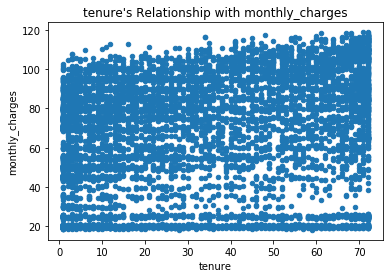

In [48]:
correlation_exploration(telco, 'tenure', 'monthly_charges')

___

##### Create Hypotheses

- Does tenure correlate with total charges? 

>$H_0$: There is no linear correlation between tenure and total charges.

>$H_a$: There is a linear correlation between tenure and total charges.

##### Calculate  p-value & t-statistic

- Based on the r and p-value, I reject the Null hypothesis. There is a strong correlation, r = 0.83, between tenure and total charges.


- This is not surprising because total charges necessarily add up the longer a customer remain with the company, tenure. Our p-value of 0 informs us that the finding is significant.

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.83


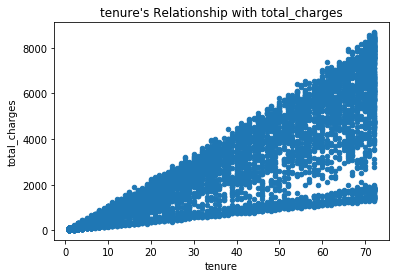

In [49]:
correlation_exploration(telco, 'tenure', 'total_charges')

___

##### Create Hypotheses

- What happens if I control for phone and internet service?

>$H_0$: There is no linear correlation between tenure and monthly charges for customers who don't have phone but do have DSL services.

>$H_a$: There is a linear correlation between tenure and monthly charges for customers who don't have phone but do have DSL services.

In [50]:
# Create a subset of customers without phone service but with internet.
# This ONLY includes DSL as I found that Fiber customers ALL have phone service.

no_phone_yes_dsl = telco[(telco.phone_service == 'No') & ((telco.internet_service_type_id == 1) | (telco.internet_service_type_id == 2))]
no_phone_yes_dsl.head()

,customer_id,monthly_charges,tenure,total_charges,phone_service,internet_service_type_id
10,0017-DINOC,45.20,54,2460.55,No,1
14,0019-GFNTW,45.05,56,2560.10,No,1
16,0020-JDNXP,61.25,34,1993.20,No,1
19,0023-HGHWL,25.10,1,25.10,No,1
25,0032-PGELS,30.50,1,30.50,No,1


##### Calculate  p-value & t-statistic

- I reject the Null hypothesis that there is no correlation between tenure and monthly charges for customers who don't have phone but do have DSL based on the calculated p-value being below our alpha of 0.05 and our r of 0.59.

The p-value is: 4.022392937551241e-64. There is 0.0% chance that we see these results by chance.
r = 0.59


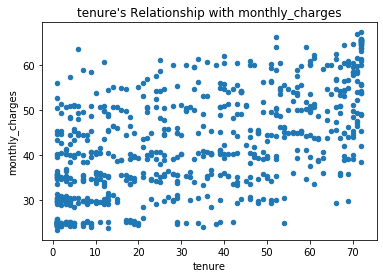

In [51]:
# The relationship between tenure and monthly charges for customers that don't have phone service
# but DO have DSL

correlation_exploration(no_phone_yes_dsl, 'tenure', 'monthly_charges')

##### Create Hypotheses

>$H_0$: There is no linear correlation between tenure and monthly charges for customers with phone and Fiber services.

>$H_a$: There is a linear correlation between tenure and monthly charges for customers with phone and Fiber services.

In [52]:
# Create subset of customers who have Fiber... all Fiber customers also have phone service

yes_phone_yes_fiber = telco[telco.internet_service_type_id == 2]
yes_phone_yes_fiber.head()

,customer_id,monthly_charges,tenure,total_charges,phone_service,internet_service_type_id
2,0004-TLHLJ,73.90,4,280.85,Yes,2
3,0011-IGKFF,98.00,13,1237.85,Yes,2
4,0013-EXCHZ,83.90,3,267.40,Yes,2
6,0013-SMEOE,109.70,71,7904.25,Yes,2
7,0014-BMAQU,84.65,63,5377.80,Yes,2


##### Calculate  p-value & t-statistic

- I reject the Null hypothesis that there is no correlation between tenure and montlhy charges for customers who have Fiber and phone services based on the p-value being below our alpha of 0.05 and our r of 0.62. 


- There is a positive correlation between tenure and monthly charges for customers with Fiber and phone service.

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.62


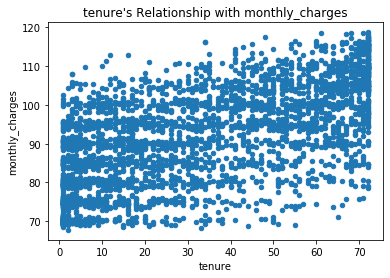

In [53]:
# the correlation of tenure and monthly charges for customers who have phone and Fiber service

correlation_exploration(yes_phone_yes_fiber, 'tenure', 'monthly_charges')

___

## Chi Square ($x^2$) - Categorical v Categorical Variables

### <font color=red>What is a Chi Square test?</font>

- The Chi Square test is used to determine whether there is a statistically significant difference between the expected and observed frequencies in one or more categories. Observations are classfied into mutually exclusive classes. In other words, it is a way of testing for group membership.

### <font color=orange>So What?</font>

- The chi square test works by comparing the observed/actual contingency table against the expected/predicted contingency table that would be the case if group membership in the variables were independent.


Were people with a higher ticket class on the Titanic more likely to survive?

>$H_0$ = Survival rate is independent of ticket class.

>$H_a$ = Survival rate is not independent of ticket class.

Does the type of service package a customer has affect the likelihood that she will churn?

>$H_0$ = Churn is independent of type of service package.

>$H_a$ = Churn is not independent of type of service package.

### <font color=green>Now What?</font>

```python
# ctab == observed values

ctab = pd.crosstab(df.Series, df.Series)

#expected == values we would expect to see if the variables are independent of each other.

chi2, p, degf, expected = stats.chi2_contingency(ctab)
```

___

### Chi Square Examples

**Steps**

1. Aquire data
2. Create Hypothesis - Null Hypothesis: The two variables are independent.
3. Set your confidence level and alpha
4. Calculate Test Statistic - run chi square test and use p-value to decide whether to reject the Null Hypothesis that the variables or categories are independent.

In [56]:
# Create 'tips' df using pydataset.

tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


##### Create Hypotheses

>$H_0$ = Whether a person is a smoker is independent of his/her sex.

>$H_a$ = Whether a person is a smoker is not independent of his/her sex.

##### Set Alpha

In [57]:
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha

0.05

##### Calculate  p-value

- I fail to reject the Null hypothesis that whether a person is a smoker is independent of his/her sex based on the p-value being above our alpha. 


- Our $x^2$ test informs me that the two categories, smoker and sex, are independent.

In [58]:
# Create the crosstab.

ctab = pd.crosstab(tips.smoker, tips.sex)
ctab

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


In [86]:
Chi2, p, degf, expected = stats.chi2_contingency(ctab)

In [87]:
print(f'Our p-value is {p}.')

Our p-value is 0.925417020494423.


In [88]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: False


___

##### Create Hypotheses

>$H_0$ = Whether a person churns is independent of the package type they purchase.

>$H_a$ = Whether a person churns is not independent of the package type they purchase.

##### Create a df from values and labels.

- I can create a visual to go with this.

In [89]:
index = ['Churn', 'No Churn']
columns = ['Product A', 'Product B']

observed = pd.DataFrame([[100, 50], [120, 28]], index=index, columns=columns)
observed

,Product A,Product B
Churn,100,50
No Churn,120,28


##### Calculate  p-value

- I reject the Null hypothesis that whether a person churns is independent of the package type they purchase based on the p-value being below the set alpha. 


- My $x^2$ test informs me that the two categories, package and churn, are not independent.

In [90]:
Chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'Our p-value is {p}.')

Our p-value is 0.006966211555667255.


In [91]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: True
